# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

645

In [5]:
cities

['bilma',
 'busselton',
 'malchin',
 'itupiranga',
 'taolanaro',
 'vardo',
 'karratha',
 'marienburg',
 'kerema',
 'rikitea',
 'kloulklubed',
 'new norfolk',
 'si satchanalai',
 'vaini',
 'ushuaia',
 'shush',
 'bethel',
 'hilo',
 'east london',
 'castro',
 'sitka',
 'albany',
 'mataura',
 'barrow',
 'mount isa',
 'sawakin',
 'itarema',
 'kavieng',
 'cape town',
 'pochutla',
 'soyo',
 'campo grande',
 'karaul',
 'kapaa',
 'hobart',
 'svetlyy',
 'aklavik',
 'puerto ayora',
 'caravelas',
 'bluff',
 'bambanglipuro',
 'donskoye',
 'certesti',
 'bredasdorp',
 'atrauli',
 'aksu',
 'amderma',
 'srednekolymsk',
 'half moon bay',
 'hobyo',
 'mar del plata',
 'tasiilaq',
 'chuy',
 'avarua',
 'shuyskoye',
 'tharad',
 'severo-kurilsk',
 'punta arenas',
 'akyab',
 'thompson',
 'belushya guba',
 'acarau',
 'yellowknife',
 'udachnyy',
 'tuktoyaktuk',
 'ahipara',
 'mahebourg',
 'harbour breton',
 'north augusta',
 'port alfred',
 'tungkang',
 'awjilah',
 'gimli',
 'saint george',
 'guerrero negro',
 'h

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
print("Beginning Data Retrieval")
print("-----------------------------")

data_list = []
for x in range(len(cities)):
    print(f"Making request number: {x} for city: {cities[x]}")

    url = "http://api.openweathermap.org/data/2.5/weather?q="+cities[x]+"&appid="+weather_api_key
    #print(url)
    
    data = requests.get(url).json()
    if data['cod'] == '404':
        print('City not found. Skipping...')       
    else:
        data_list.append(data)    
    
print("-----------------------------")
print("Data Retrieval Complete")




Beginning Data Retrieval
-----------------------------
Making request number: 0 for city: bilma
Making request number: 1 for city: busselton
Making request number: 2 for city: malchin
Making request number: 3 for city: itupiranga
Making request number: 4 for city: taolanaro
City not found. Skipping...
Making request number: 5 for city: vardo
Making request number: 6 for city: karratha
Making request number: 7 for city: marienburg
Making request number: 8 for city: kerema
Making request number: 9 for city: rikitea
Making request number: 10 for city: kloulklubed
Making request number: 11 for city: new norfolk
Making request number: 12 for city: si satchanalai
Making request number: 13 for city: vaini
Making request number: 14 for city: ushuaia
Making request number: 15 for city: shush
Making request number: 16 for city: bethel
Making request number: 17 for city: hilo
Making request number: 18 for city: east london
Making request number: 19 for city: castro
Making request number: 20 for c

Making request number: 172 for city: tuatapere
Making request number: 173 for city: garm
City not found. Skipping...
Making request number: 174 for city: saint anthony
Making request number: 175 for city: sabang
Making request number: 176 for city: asau
Making request number: 177 for city: bairiki
Making request number: 178 for city: ilulissat
Making request number: 179 for city: itoman
Making request number: 180 for city: warrington
Making request number: 181 for city: iqaluit
Making request number: 182 for city: skelleftea
Making request number: 183 for city: vestmannaeyjar
Making request number: 184 for city: samusu
City not found. Skipping...
Making request number: 185 for city: columbia
Making request number: 186 for city: kitaibaraki
Making request number: 187 for city: tasbuget
City not found. Skipping...
Making request number: 188 for city: attawapiskat
City not found. Skipping...
Making request number: 189 for city: faya
Making request number: 190 for city: rayon
Making reques

Making request number: 339 for city: porto novo
Making request number: 340 for city: cidreira
Making request number: 341 for city: diego de almagro
Making request number: 342 for city: beba
Making request number: 343 for city: attendorn
Making request number: 344 for city: bati
Making request number: 345 for city: grand river south east
City not found. Skipping...
Making request number: 346 for city: talnakh
Making request number: 347 for city: jieshi
Making request number: 348 for city: broome
Making request number: 349 for city: gua musang
Making request number: 350 for city: vila velha
Making request number: 351 for city: port blair
Making request number: 352 for city: toftir
City not found. Skipping...
Making request number: 353 for city: fort nelson
Making request number: 354 for city: quatre cocos
Making request number: 355 for city: chumikan
Making request number: 356 for city: san quintin
Making request number: 357 for city: bandar-e torkaman
City not found. Skipping...
Making 

Making request number: 508 for city: orchard homes
Making request number: 509 for city: le port
Making request number: 510 for city: brae
Making request number: 511 for city: ciudad bolivar
Making request number: 512 for city: jos
Making request number: 513 for city: bar harbor
Making request number: 514 for city: yulara
Making request number: 515 for city: ramgarh
Making request number: 516 for city: mrirt
City not found. Skipping...
Making request number: 517 for city: alice springs
Making request number: 518 for city: mahaicony
City not found. Skipping...
Making request number: 519 for city: pandaria
Making request number: 520 for city: kimbe
Making request number: 521 for city: loknya
Making request number: 522 for city: puerto suarez
Making request number: 523 for city: conceicao do araguaia
Making request number: 524 for city: sioux lookout
Making request number: 525 for city: sangar
Making request number: 526 for city: toliary
City not found. Skipping...
Making request number: 5

In [7]:
data_list[2]

{'coord': {'lon': 12.78, 'lat': 53.73},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 286.36,
  'feels_like': 285.24,
  'temp_min': 284.26,
  'temp_max': 287.59,
  'pressure': 1018,
  'humidity': 87},
 'visibility': 10000,
 'wind': {'speed': 2.1, 'deg': 80},
 'clouds': {'all': 21},
 'dt': 1596239028,
 'sys': {'type': 1,
  'id': 1847,
  'country': 'DE',
  'sunrise': 1596252239,
  'sunset': 1596308776},
 'timezone': 7200,
 'id': 2874131,
 'name': 'Malchin',
 'cod': 200}

In [8]:
def data_construction(data):
    try:
        data_new = {
        "City": data['name'],
        "Lat": data['coord']['lat'],
        "Lon": data['coord']['lon'],
        "Max Temp": data['main']['temp_max'],
        "Humidity": data['main']['humidity'],
        "Cloudiness": data['clouds']['all'],
        "Wind Speed": data['wind']['speed'],
        "Country": data['sys']['country'],
        "Date": data['dt']            
    }
        

    except KeyError:
        return {}
    
    return data_new
 
#data_construction(data_list[100])
weather_data = [data_construction(data) for data in data_list]
weather_data

[{'City': 'Bilma',
  'Lat': 18.69,
  'Lon': 12.92,
  'Max Temp': 304.91,
  'Humidity': 45,
  'Cloudiness': 95,
  'Wind Speed': 2.68,
  'Country': 'NE',
  'Date': 1596239027},
 {'City': 'Busselton',
  'Lat': -33.65,
  'Lon': 115.33,
  'Max Temp': 280.37,
  'Humidity': 89,
  'Cloudiness': 78,
  'Wind Speed': 2.1,
  'Country': 'AU',
  'Date': 1596239021},
 {'City': 'Malchin',
  'Lat': 53.73,
  'Lon': 12.78,
  'Max Temp': 287.59,
  'Humidity': 87,
  'Cloudiness': 21,
  'Wind Speed': 2.1,
  'Country': 'DE',
  'Date': 1596239028},
 {'City': 'Itupiranga',
  'Lat': -5.13,
  'Lon': -49.33,
  'Max Temp': 299.15,
  'Humidity': 57,
  'Cloudiness': 5,
  'Wind Speed': 1.12,
  'Country': 'BR',
  'Date': 1596238910},
 {'City': 'Vardø',
  'Lat': 70.37,
  'Lon': 31.11,
  'Max Temp': 283.04,
  'Humidity': 91,
  'Cloudiness': 100,
  'Wind Speed': 6.34,
  'Country': 'NO',
  'Date': 1596239030},
 {'City': 'Karratha',
  'Lat': -20.74,
  'Lon': 116.85,
  'Max Temp': 294.95,
  'Humidity': 23,
  'Cloudiness': 0

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
weather_data = pd.DataFrame(weather_data)
weather_data
weather_data.to_csv('weather_data.csv')

In [10]:
weather_data.count()

City          590
Lat           590
Lon           590
Max Temp      590
Humidity      590
Cloudiness    590
Wind Speed    590
Country       590
Date          590
dtype: int64

In [11]:
weather_data.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bilma,18.69,12.92,304.91,45,95,2.68,NE,1596239027
1,Busselton,-33.65,115.33,280.37,89,78,2.10,AU,1596239021
2,Malchin,53.73,12.78,287.59,87,21,2.10,DE,1596239028
3,Itupiranga,-5.13,-49.33,299.15,57,5,1.12,BR,1596238910
4,Vardø,70.37,31.11,283.04,91,100,6.34,NO,1596239030


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
humidity_filter = weather_data['Humidity'] > 100
is_True = 'True' in humidity_filter
is_True

False

In [13]:
weather_data.describe()

,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,5.900000e+02
mean,21.048085,20.184915,293.844678,71.211864,48.357627,3.463661,1.596239e+09
std,33.040176,89.407093,7.360480,21.069072,38.912892,2.335800,1.281025e+02
min,-54.800000,-175.200000,274.150000,1.000000,0.000000,0.080000,1.596239e+09
25%,-6.870000,-56.062500,288.150000,59.000000,5.000000,1.510000,1.596239e+09
50%,24.165000,23.035000,294.800000,76.000000,44.000000,3.000000,1.596239e+09
75%,48.825000,99.042500,299.157500,87.000000,90.000000,4.882500,1.596239e+09
max,78.220000,178.420000,317.040000,100.000000,100.000000,13.530000,1.596239e+09


In [14]:
#  Get the indices of cities that have humidity over 100%.
outlier_index = weather_data.index[weather_data['Humidity'] > 100]
outlier_index

Int64Index([], dtype='int64')

In [15]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_data.drop(index=outlier_index, inplace=False)
clean_city_data.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bilma,18.69,12.92,304.91,45,95,2.68,NE,1596239027
1,Busselton,-33.65,115.33,280.37,89,78,2.10,AU,1596239021
2,Malchin,53.73,12.78,287.59,87,21,2.10,DE,1596239028
3,Itupiranga,-5.13,-49.33,299.15,57,5,1.12,BR,1596238910
4,Vardø,70.37,31.11,283.04,91,100,6.34,NO,1596239030


In [16]:
# Extract relevant fields from the data frame
clean_city_data['Date'] = pd.to_datetime(clean_city_data['Date'], unit='s').apply(lambda t: t.strftime('%Y-%m-%d'))
clean_city_data['Date']
# Export the City_Data into a csv
clean_city_data.to_csv('clean_city_data.csv')


In [17]:
clean_city_data.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bilma,18.69,12.92,304.91,45,95,2.68,NE,2020-07-31
1,Busselton,-33.65,115.33,280.37,89,78,2.10,AU,2020-07-31
2,Malchin,53.73,12.78,287.59,87,21,2.10,DE,2020-07-31
3,Itupiranga,-5.13,-49.33,299.15,57,5,1.12,BR,2020-07-31
4,Vardø,70.37,31.11,283.04,91,100,6.34,NO,2020-07-31


In [18]:
date = clean_city_data['Date'].unique()
date[0]

'2020-07-31'

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [19]:
#plotting function 
def scatter_plot(x, y, item, date):
    plt.figure(figsize=(20,10))
    plt.scatter(x, y, marker="o", facecolors="blue", edgecolors="black")
    plt.title("City Latitude vs {items}({dates})".format(items = item, dates = date), fontsize = 40)
    plt.xlabel("Latitude", fontsize = 30)
    plt.ylabel("Max Temperature (F)", fontsize = 30)
    plt.grid()
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

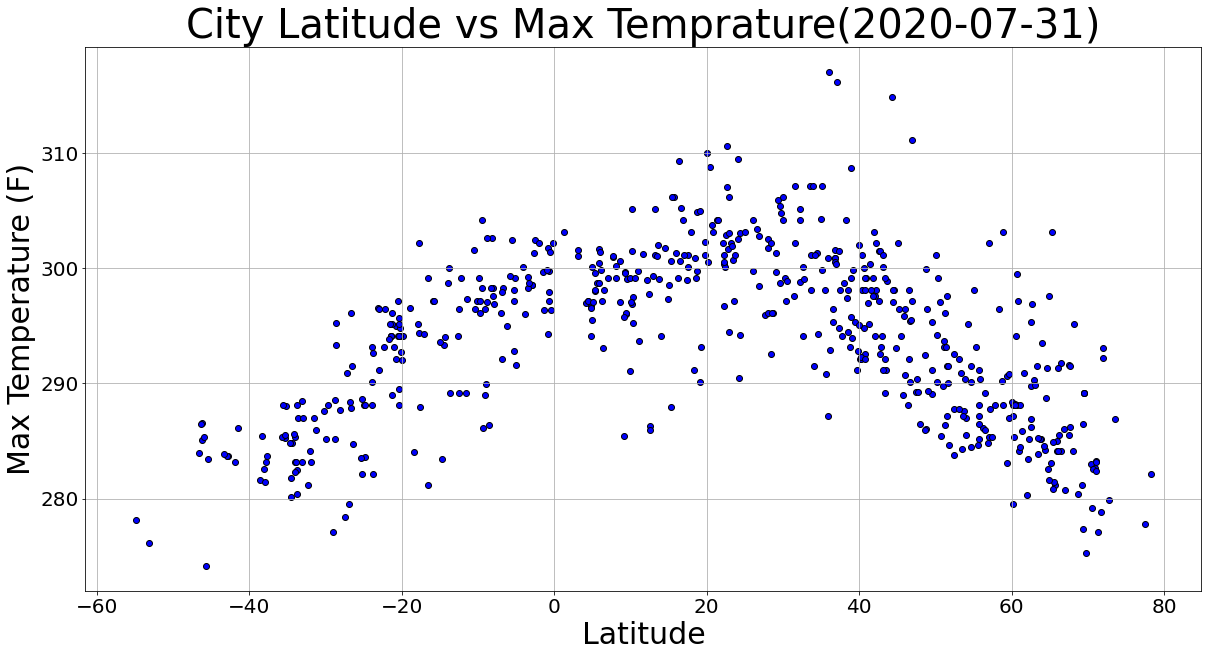

In [20]:
scatter_plot(clean_city_data['Lat'], clean_city_data['Max Temp'], 'Max Temprature', date[0] )

## Latitude vs. Humidity Plot

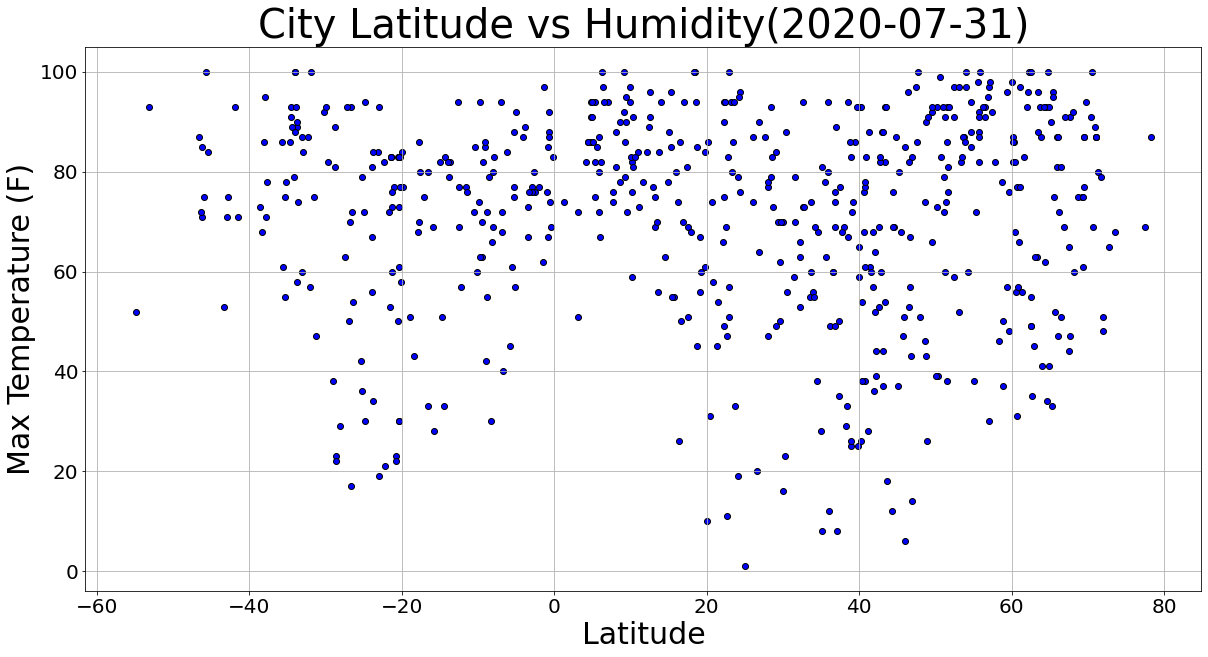

In [21]:
scatter_plot(clean_city_data['Lat'], clean_city_data['Humidity'], 'Humidity', date[0] )

## Latitude vs. Cloudiness Plot

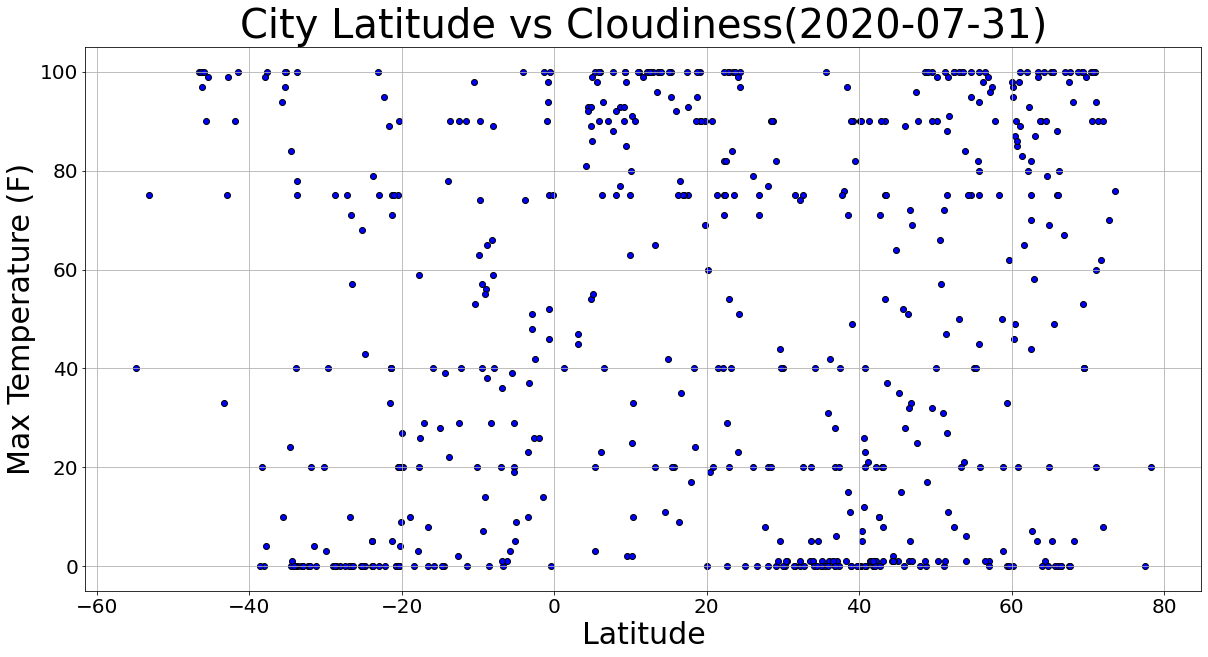

In [22]:
scatter_plot(clean_city_data['Lat'], clean_city_data['Cloudiness'], 'Cloudiness', date[0] )

## Latitude vs. Wind Speed Plot

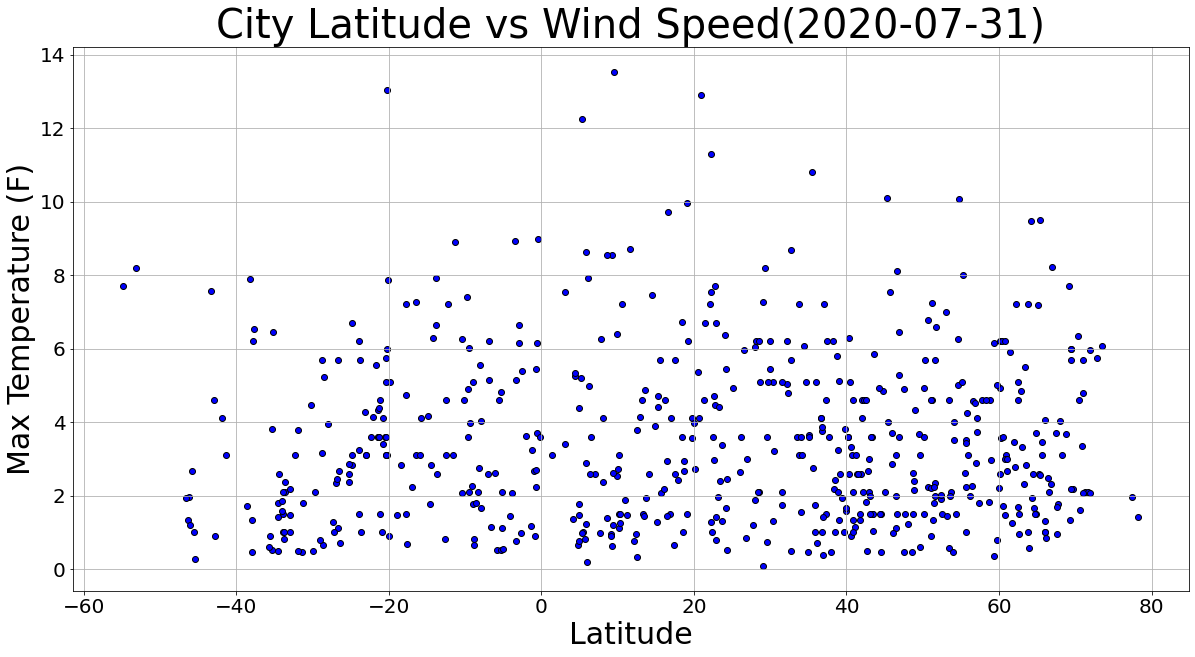

In [23]:
scatter_plot(clean_city_data['Lat'], clean_city_data['Wind Speed'], 'Wind Speed', date[0] )

## Linear Regression

In [44]:
# OPTIONAL: Create a function to create Linear Regression plots
def regression(x, y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    return regress_values, line_eq, rvalue, pvalue, stderr
    

In [50]:
def reg_plot(x, y, regress_values, line_eq, item, rvalue):
    plt.figure(figsize=(20,10))
    plt.scatter(x, y, marker="o", facecolors="blue", edgecolors="black")
    plt.plot(x,regress_values,"r-", label = line_eq)
    
    #plt.annotate(line_eq, ((x.max())/2,regress_values/2), fontsize=10, color = "red")
    plt.xlabel("Latitude", fontsize = 30)
    plt.ylabel(item, fontsize = 30)
    plt.legend(fontsize=30)
    plt.grid()
    print(f"The r-squared is: {rvalue**2}")

In [51]:
# Create Northern and Southern Hemisphere DataFrames
Northern = clean_city_data[clean_city_data['Lat'] >= 0]
Southern = clean_city_data[clean_city_data['Lat'] <= 0]
Southern

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Busselton,-33.65,115.33,280.37,89,78,2.10,AU,2020-07-31
3,Itupiranga,-5.13,-49.33,299.15,57,5,1.12,BR,2020-07-31
5,Karratha,-20.74,116.85,294.95,23,0,3.40,AU,2020-07-31
7,Kerema,-7.96,145.78,298.25,69,89,4.03,PG,2020-07-31
8,Rikitea,-23.12,-134.97,296.54,84,100,4.27,PF,2020-07-31
...,...,...,...,...,...,...,...,...,...
570,Pimentel,-6.84,-79.93,292.15,68,1,6.20,PE,2020-07-31
572,Charlestown,-32.95,151.67,287.04,84,0,2.18,AU,2020-07-31
574,Chilca,-12.52,-76.74,289.15,77,90,3.10,PE,2020-07-31
582,Khorixas,-20.37,14.97,289.54,30,0,5.75,NA,2020-07-31


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [52]:
regress_values = regression(Northern['Lat'], Northern['Max Temp'])[0]
line_eq = regression(Northern['Lat'], Northern['Max Temp'])[1]
rvalue = regression(Northern['Lat'], Northern['Max Temp'])[2]
pvalue = regression(Northern['Lat'], Northern['Max Temp'])[3]


In [53]:
Northern['Lat'].max()

78.22

The r-squared is: 0.4361437658599683


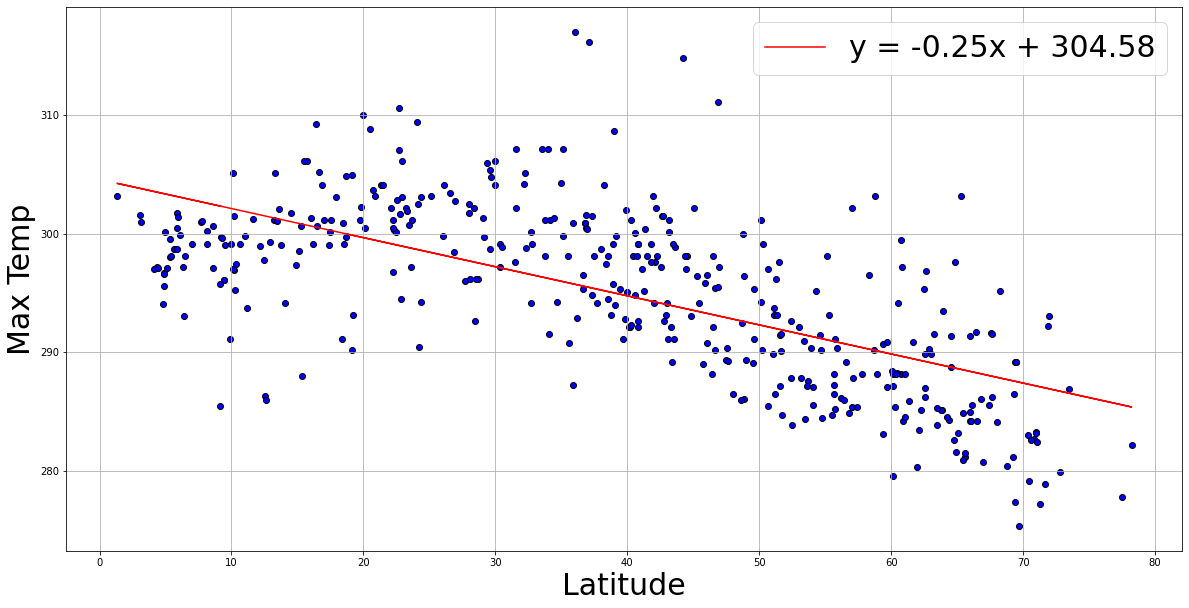

In [54]:
reg_plot(Northern['Lat'], Northern['Max Temp'], regress_values, line_eq, "Max Temp", rvalue)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [55]:
regress_values = regression(Southern['Lat'], Southern['Max Temp'])[0]
line_eq = regression(Southern['Lat'], Southern['Max Temp'])[1]
rvalue = regression(Southern['Lat'], Southern['Max Temp'])[2]
pvalue = regression(Southern['Lat'], Southern['Max Temp'])[3]

The r-squared is: 0.6399022546496329


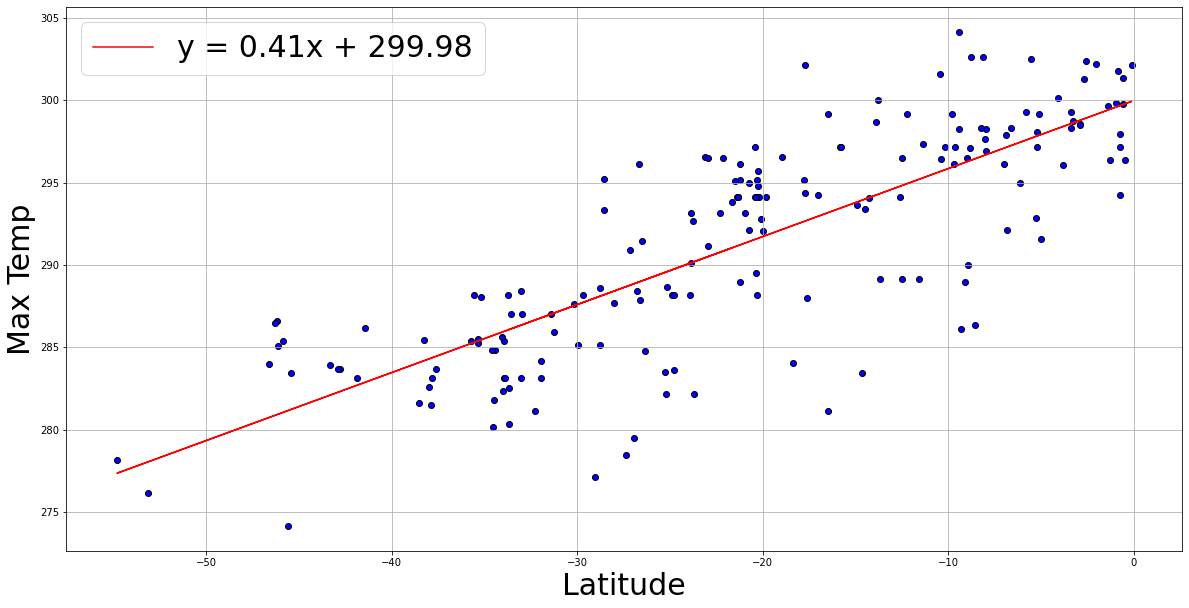

In [56]:
reg_plot(Southern['Lat'], Southern['Max Temp'], regress_values, line_eq, "Max Temp", rvalue)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0010881641762322388


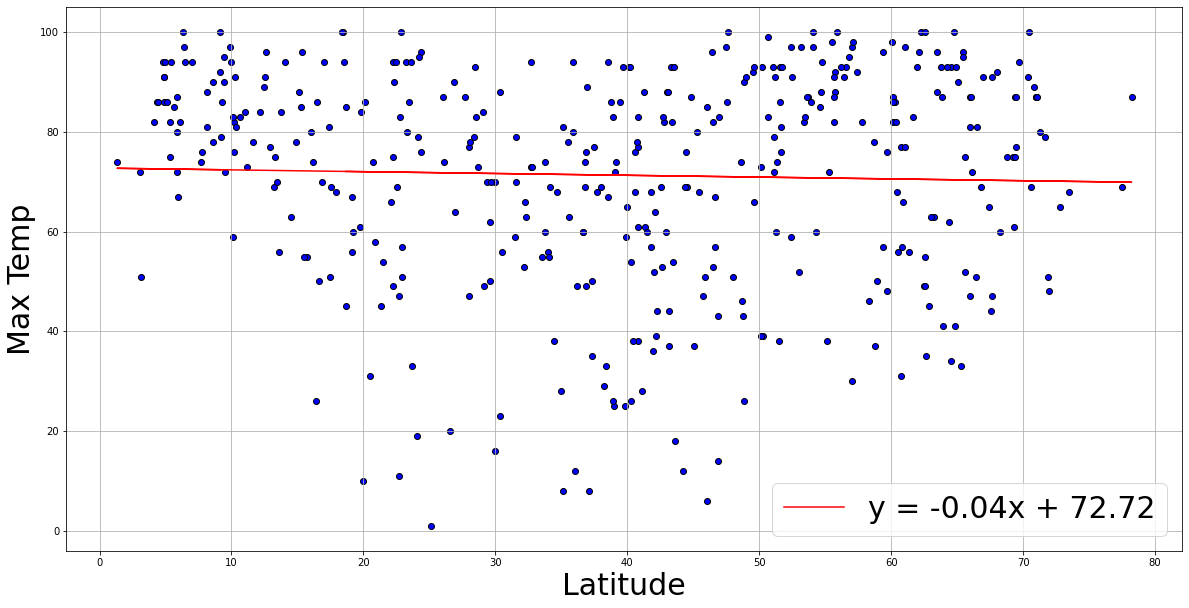

In [57]:
regress_values = regression(Northern['Lat'], Northern['Humidity'])[0]
line_eq = regression(Northern['Lat'], Northern['Humidity'])[1]
rvalue = regression(Northern['Lat'], Northern['Humidity'])[2]
pvalue = regression(Northern['Lat'], Northern['Humidity'])[3]

reg_plot(Northern['Lat'], Northern['Humidity'], regress_values, line_eq, "Max Temp", rvalue)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0015273624578185756


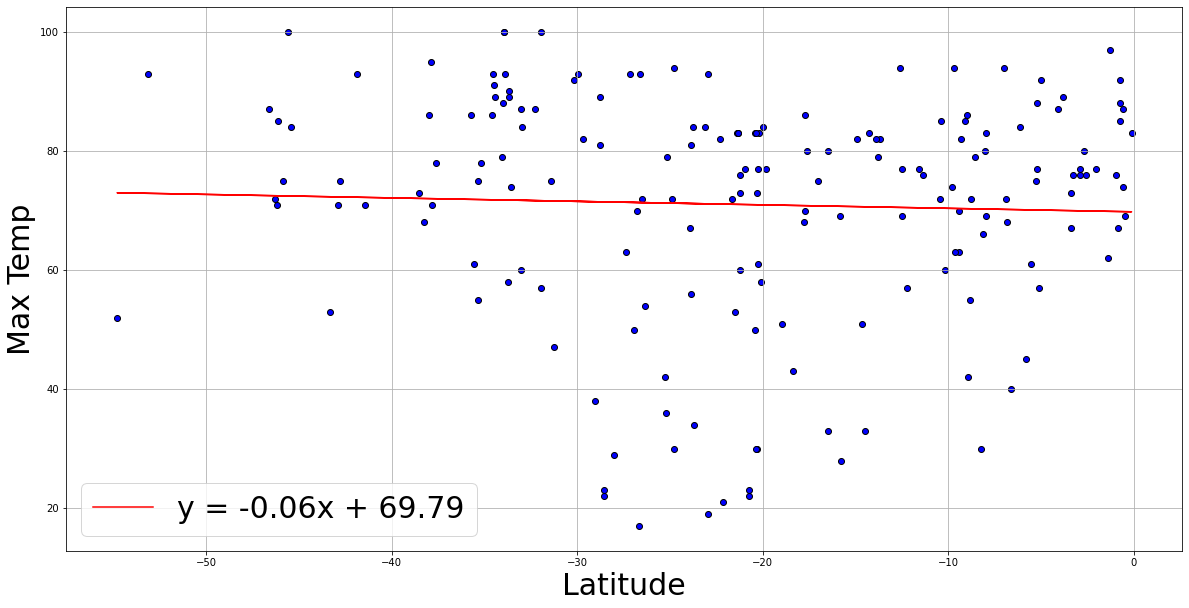

In [58]:
regress_values = regression(Southern['Lat'], Southern['Humidity'])[0]
line_eq = regression(Southern['Lat'], Southern['Humidity'])[1]
rvalue = regression(Southern['Lat'], Southern['Humidity'])[2]
pvalue = regression(Southern['Lat'], Southern['Humidity'])[3]

reg_plot(Southern['Lat'], Southern['Humidity'], regress_values, line_eq, "Max Temp", rvalue)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.006050815947276559


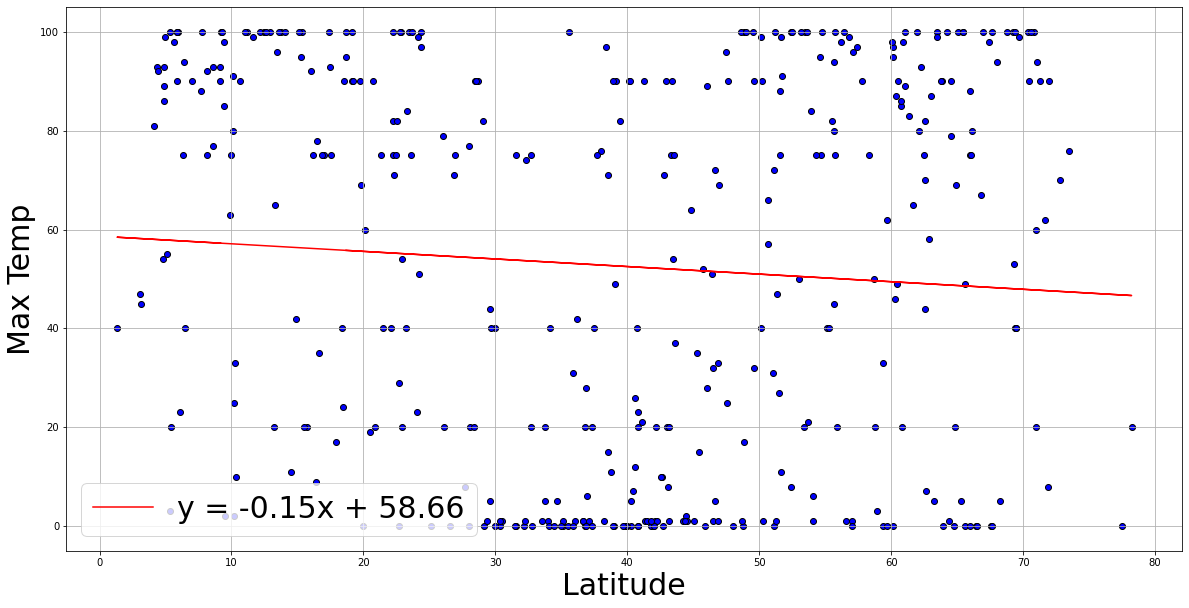

In [59]:
regress_values = regression(Northern['Lat'], Northern['Cloudiness'])[0]
line_eq = regression(Northern['Lat'], Northern['Cloudiness'])[1]
rvalue = regression(Northern['Lat'], Northern['Cloudiness'])[2]
pvalue = regression(Northern['Lat'], Northern['Cloudiness'])[3]

reg_plot(Northern['Lat'], Northern['Cloudiness'], regress_values, line_eq, "Max Temp", rvalue)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.005622036768012653


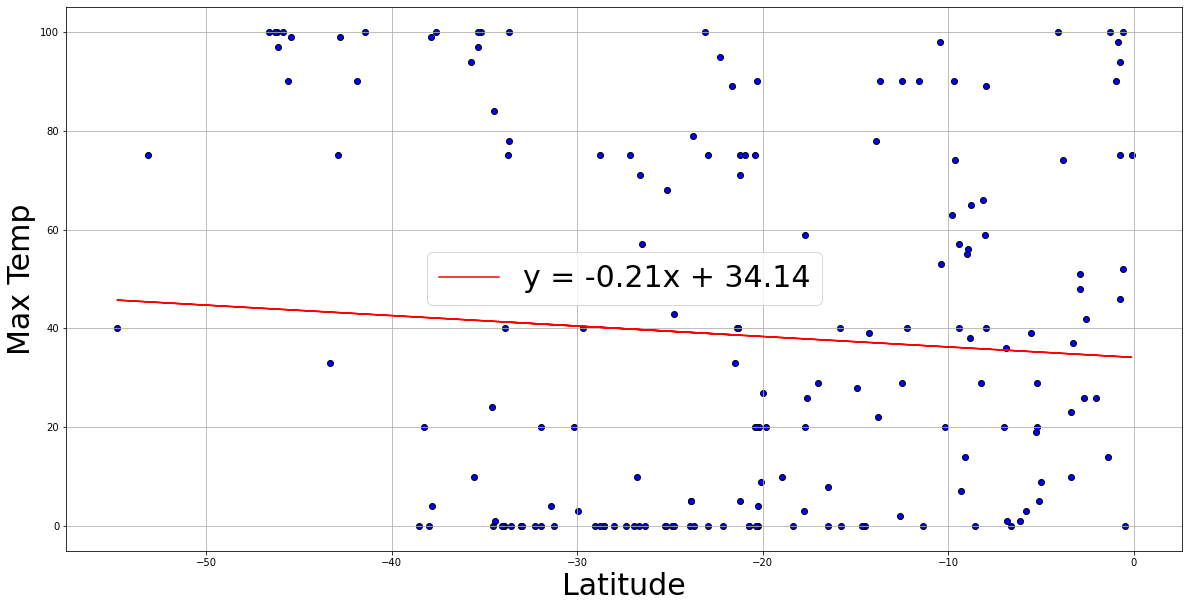

In [60]:
regress_values = regression(Southern['Lat'], Southern['Cloudiness'])[0]
line_eq = regression(Southern['Lat'], Southern['Cloudiness'])[1]
rvalue = regression(Southern['Lat'], Southern['Cloudiness'])[2]
pvalue = regression(Southern['Lat'], Southern['Cloudiness'])[3]

reg_plot(Southern['Lat'], Southern['Cloudiness'], regress_values, line_eq, "Max Temp", rvalue)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0023712079846851288


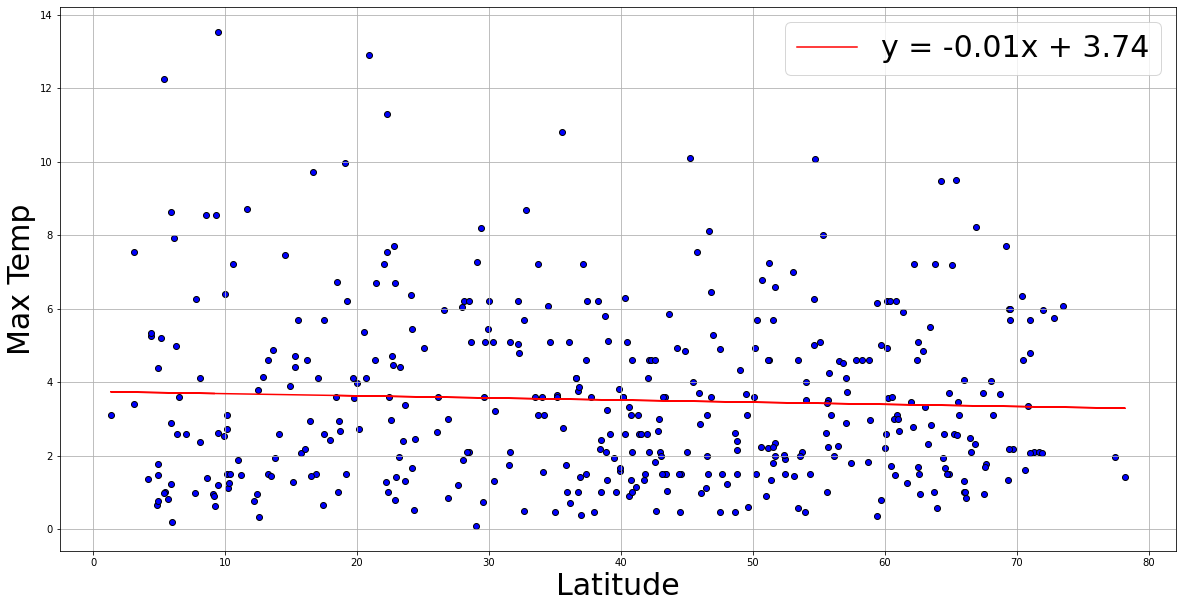

In [61]:
regress_values = regression(Northern['Lat'], Northern['Wind Speed'])[0]
line_eq = regression(Northern['Lat'], Northern['Wind Speed'])[1]
rvalue = regression(Northern['Lat'], Northern['Wind Speed'])[2]
pvalue = regression(Northern['Lat'], Northern['Wind Speed'])[3]

reg_plot(Northern['Lat'], Northern['Wind Speed'], regress_values, line_eq, "Max Temp", rvalue)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.019523425331112322


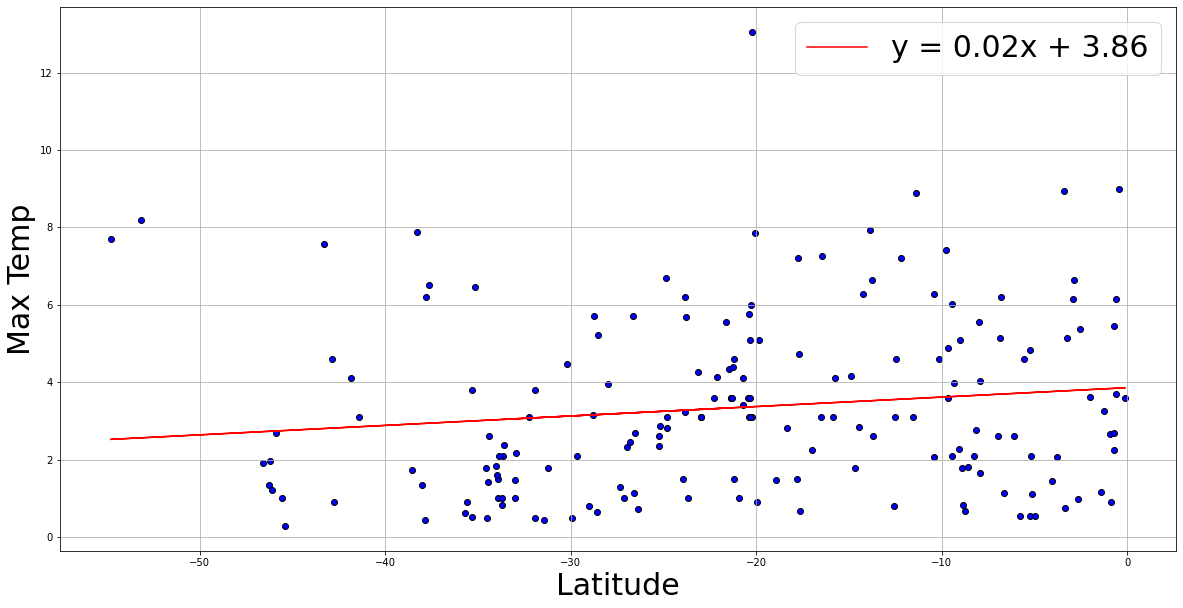

In [62]:
regress_values = regression(Southern['Lat'], Southern['Wind Speed'])[0]
line_eq = regression(Southern['Lat'], Southern['Wind Speed'])[1]
rvalue = regression(Southern['Lat'], Southern['Wind Speed'])[2]
pvalue = regression(Southern['Lat'], Southern['Wind Speed'])[3]

reg_plot(Southern['Lat'], Southern['Wind Speed'], regress_values, line_eq, "Max Temp", rvalue)